# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
#All imports

import os
import pandas as pd
import numpy as np
import re
import pylab as pl

PUIdata = os.getenv('PUIDATA')

In [2]:
# Loading the first dataset
# 311 complaints data from 2010

data_1 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', \
                   usecols = ['Created Date','Agency Name','Complaint Type', 'Descriptor','Borough','Community Board',\
                              'Resolution Description','Unique Key'])

In [3]:
data_1.head()

Unique Key            Created Date                         Agency Name  \
0    31911011  11/05/2015 02:59:15 AM        Department of Transportation   
1    31908754  11/05/2015 02:09:49 AM                               CHALL   
2    31910423  11/05/2015 02:06:51 AM  Department of Parks and Recreation   
3    31909924  11/05/2015 02:02:20 AM     New York City Police Department   
4    31913310  11/05/2015 01:57:20 AM        HRA Benefit Card Replacement   

                  Complaint Type                   Descriptor  \
0               Street Condition                      Pothole   
1          Opinion for the Mayor                      HOUSING   
2  Root/Sewer/Sidewalk Condition  Trees and Sidewalks Program   
3                Illegal Parking              Blocked Hydrant   
4       Benefit Card Replacement                     Medicaid   

                              Resolution Description Community Board  \
0                                                NaN     13 BROOKLYN   
1  Your comments have been submitted to the Mayor...   0 Unspecified   
2  The Department of Parks and Recreation usually...     18 BROOKLYN   
3  Your complaint has been received by the Police...     12 BROOKLYN   
4  The Human Resources Administration received yo...   0 Unspecified   

       Borough  
0     BROOKLYN  
1  Unspecified  
2     BROOKLYN  
3     BROOKLYN  
4  Unspecified

In [4]:
#data_2 is my working data set. 

data_2 = data_1
data_2.head()

Unique Key            Created Date                         Agency Name  \
0    31911011  11/05/2015 02:59:15 AM        Department of Transportation   
1    31908754  11/05/2015 02:09:49 AM                               CHALL   
2    31910423  11/05/2015 02:06:51 AM  Department of Parks and Recreation   
3    31909924  11/05/2015 02:02:20 AM     New York City Police Department   
4    31913310  11/05/2015 01:57:20 AM        HRA Benefit Card Replacement   

                  Complaint Type                   Descriptor  \
0               Street Condition                      Pothole   
1          Opinion for the Mayor                      HOUSING   
2  Root/Sewer/Sidewalk Condition  Trees and Sidewalks Program   
3                Illegal Parking              Blocked Hydrant   
4       Benefit Card Replacement                     Medicaid   

                              Resolution Description Community Board  \
0                                                NaN     13 BROOKLYN   
1  Your comments have been submitted to the Mayor...   0 Unspecified   
2  The Department of Parks and Recreation usually...     18 BROOKLYN   
3  Your complaint has been received by the Police...     12 BROOKLYN   
4  The Human Resources Administration received yo...   0 Unspecified   

       Borough  
0     BROOKLYN  
1  Unspecified  
2     BROOKLYN  
3     BROOKLYN  
4  Unspecified

In [5]:
data_2 = data_2.drop('Unique Key',axis=1)
data_2.head()

Created Date                         Agency Name  \
0  11/05/2015 02:59:15 AM        Department of Transportation   
1  11/05/2015 02:09:49 AM                               CHALL   
2  11/05/2015 02:06:51 AM  Department of Parks and Recreation   
3  11/05/2015 02:02:20 AM     New York City Police Department   
4  11/05/2015 01:57:20 AM        HRA Benefit Card Replacement   

                  Complaint Type                   Descriptor  \
0               Street Condition                      Pothole   
1          Opinion for the Mayor                      HOUSING   
2  Root/Sewer/Sidewalk Condition  Trees and Sidewalks Program   
3                Illegal Parking              Blocked Hydrant   
4       Benefit Card Replacement                     Medicaid   

                              Resolution Description Community Board  \
0                                                NaN     13 BROOKLYN   
1  Your comments have been submitted to the Mayor...   0 Unspecified   
2  The Department of Parks and Recreation usually...     18 BROOKLYN   
3  Your complaint has been received by the Police...     12 BROOKLYN   
4  The Human Resources Administration received yo...   0 Unspecified   

       Borough  
0     BROOKLYN  
1  Unspecified  
2     BROOKLYN  
3     BROOKLYN  
4  Unspecified

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [6]:
# Check if all Boroughs and Community Districts are represented in the Data 

data_2['Borough'].unique()

array(['BROOKLYN', 'Unspecified', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'QUEENS'], dtype=object)

In [7]:
# How many unique values do we have? 

len(data_2) - data_2.duplicated().sum()

8158037

In [8]:
len(data_2)

10187766

In [9]:
#Filtering the "Unspecified" data

data_2 = data_2[data_2['Borough'] != ('Unspecified')]
data_2.head()

Created Date                         Agency Name  \
0  11/05/2015 02:59:15 AM        Department of Transportation   
2  11/05/2015 02:06:51 AM  Department of Parks and Recreation   
3  11/05/2015 02:02:20 AM     New York City Police Department   
5  11/05/2015 01:55:55 AM        Department of Transportation   
7  11/05/2015 01:47:12 AM     New York City Police Department   

                  Complaint Type                   Descriptor  \
0               Street Condition                      Pothole   
2  Root/Sewer/Sidewalk Condition  Trees and Sidewalks Program   
3                Illegal Parking              Blocked Hydrant   
5              Highway Condition            Pothole - Highway   
7             Noise - Commercial             Loud Music/Party   

                              Resolution Description   Community Board  \
0                                                NaN       13 BROOKLYN   
2  The Department of Parks and Recreation usually...       18 BROOKLYN   
3  Your complaint has been received by the Police...       12 BROOKLYN   
5  The Department of Transportation requires 10 d...  02 STATEN ISLAND   
7  Your complaint has been forwarded to the New Y...      08 MANHATTAN   

         Borough  
0       BROOKLYN  
2       BROOKLYN  
3       BROOKLYN  
5  STATEN ISLAND  
7      MANHATTAN

In [10]:
#checking the other "unspecified" community district fields

data_2['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN', 'Unspecified BR

In [11]:
#Filtering the Unspecified "Community Districts" Data

data_2 = data_2[data_2['Community Board'] != ('Unspecified QUEENS')]
data_2 = data_2[data_2['Community Board'] != 'Unspecified MANHATTAN']
data_2 = data_2[data_2['Community Board'] != 'Unspecified BROOKLYN']
data_2 = data_2[data_2['Community Board'] != 'Unspecified BRONX']
data_2 = data_2[data_2['Community Board'] != 'Unspecified STATEN ISLAND']
data_2 = data_2[data_2['Community Board'] != '64 MANHATTAN']
data_2 = data_2[data_2['Community Board'] != '81 QUEENS']
data_2 = data_2[data_2['Community Board'] != '55 BROOKLYN']
data_2 = data_2[data_2['Community Board'] != '83 QUEENS']
data_2 = data_2[data_2['Community Board'] != '28 BRONX']
data_2 = data_2[data_2['Community Board'] != '80 QUEENS']
data_2 = data_2[data_2['Community Board'] != '26 BRONX']
data_2 = data_2[data_2['Community Board'] != '95 STATEN ISLAND']
data_2 = data_2[data_2['Community Board'] != '82 QUEENS']
data_2 = data_2[data_2['Community Board'] != '27 BRONX']
data_2 = data_2[data_2['Community Board'] != '56 BROOKLYN']
data_2 = data_2[data_2['Community Board'] != '84 QUEENS']
#data_2 = data_2[data_2['Community Board'] != '27 BRONX']

In [12]:
#Checking the Values after filtering

data_2['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

In [13]:
# Fromt the above filtering the data set size reduced by about 20% 
# We may consider reverse geocoding in order to reduce this loss of data points which might skew out results.

len(data_2)

8110945

In [14]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

#I have already filtered the Unspecified Data fields. So the number of Community districts present are 59.

print('Number of Community districts after filtering unspecified values : ', \
        len(data_2['Community Board'].unique()))

Number of Community districts after filtering unspecified values :  59


In [15]:
# Check for duplicates? Are these plausible?

# Since, we are not importing the complete dataset, we seem to be having duplicates in this truncated dataset.
# So, I need to do further research in order to take a decision on the elimination of duplicates

In [16]:
# Grouping the dataset, to get the summary statistics

data_2x = data_2.groupby(['Community Board']).count()
data_2y = data_2x.drop(['Descriptor','Resolution Description','Agency Name', 'Borough'],axis=1)
data_2y = data_2y.reset_index()
data_2y.head()

Community Board  Created Date  Complaint Type
0          01 BRONX         74631           74631
1       01 BROOKLYN        185057          185057
2      01 MANHATTAN         77974           77974
3         01 QUEENS        171484          171484
4  01 STATEN ISLAND        182713          182713

In [24]:
#Sorting the Complaints by number

data_2y['Rank'] = data_2y['Complaint Type'].rank(ascending=False)
data_2y = data_2y.drop('Created Date', axis=1)
data_2y.head()

Community Board  Complaint Type  Rank
0          01 BRONX           74631  57.0
1       01 BROOKLYN          185057   9.0
2      01 MANHATTAN           77974  55.0
3         01 QUEENS          171484  12.0
4  01 STATEN ISLAND          182713  10.0

In [25]:
# What about missing values? Can you detect any patterns? 

#This needs further research into the dataset, but within the columns imported this did not make any difference

In [26]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [27]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

# There are a lot of unknown districts in this dataset, which I have filtered. Another way to go about it would be
# to reverse geocode the locations to the correct districts, to avoid the loss of data

In [28]:
# Drop the marked districts

# We Have already dropped the unplausible districts

In [29]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
data_2y.columns = ["Community_district", "complaints_total", "rank"]
data_2y.sort_values('rank')

Community_district  complaints_total  rank
49       12 MANHATTAN            268053   1.0
50          12 QUEENS            229383   2.0
11        03 BROOKLYN            197306   3.0
30          07 QUEENS            195961   4.0
57        17 BROOKLYN            191720   5.0
20        05 BROOKLYN            189765   6.0
53        14 BROOKLYN            187794   7.0
27           07 BRONX            185729   8.0
1         01 BROOKLYN            185057   9.0
4    01 STATEN ISLAND            182713  10.0
15           04 BRONX            181953  11.0
3           01 QUEENS            171484  12.0
22          05 QUEENS            168570  13.0
47           12 BRONX            168455  14.0
52          13 QUEENS            163851  15.0
19           05 BRONX            161078  16.0
58        18 BROOKLYN            156100  17.0
29       07 MANHATTAN            151419  18.0
38          09 QUEENS            151242  19.0
48        12 BROOKLYN            150320  20.0
12       03 MANHATTAN            150296  21.0
33       08 MANHATTAN            149076  22.0
35           09 BRONX            147457  23.0
55        15 BROOKLYN            146129  24.0
21       05 MANHATTAN            142028  25.0
32        08 BROOKLYN            141119  26.0
44        11 BROOKLYN            139890  27.0
16        04 BROOKLYN            139706  28.0
41       10 MANHATTAN            137344  29.0
14   03 STATEN ISLAND            136487  30.0
36        09 BROOKLYN            135833  31.0
7        02 MANHATTAN            133860  32.0
17       04 MANHATTAN            132660  33.0
42          10 QUEENS            128116  34.0
37       09 MANHATTAN            127565  35.0
34          08 QUEENS            123131  36.0
43           11 BRONX            122081  37.0
13          03 QUEENS            122009  38.0
9    02 STATEN ISLAND            121132  39.0
6         02 BROOKLYN            121022  40.0
8           02 QUEENS            114333  41.0
24        06 BROOKLYN            114029  42.0
40        10 BROOKLYN            111837  43.0
28        07 BROOKLYN            107031  44.0
25       06 MANHATTAN            104249  45.0
54          14 QUEENS            103396  46.0
46          11 QUEENS            101908  47.0
23           06 BRONX             99547  48.0
18          04 QUEENS             99316  49.0
39           10 BRONX             95496  50.0
45       11 MANHATTAN             95413  51.0
31           08 BRONX             92733  52.0
26          06 QUEENS             90938  53.0
56        16 BROOKLYN             85467  54.0
2        01 MANHATTAN             77974  55.0
10           03 BRONX             75134  56.0
0            01 BRONX             74631  57.0
51        13 BROOKLYN             72362  58.0
5            02 BRONX             60257  59.0

In [30]:
# Safe reduced data frame (Community District level)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [31]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [32]:
# Check variables in file

list(df_pop.columns)

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 '% Total Population: Male',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Population 5 Years And Over: Speak Only English',
 '% Population 5 Years And Over: Spanish or Spanish Creole',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 '% Population 25 Years and over: Less Than Hi

In [33]:
# How many community districts are in file? 

len(df_pop['cd_id'].unique())

59

In [34]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

# Using median household income as an index to understand complaints in NYC.

df_pop_2 = df_pop[['FIPS','cd_id','Median household income (In 2014 Inflation Adjusted Dollars)']]
df_pop_2.sort('cd_id', ascending=True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


FIPS    cd_id  \
27  3604001     BK01   
30  3604004     BK02   
29  3604003     BK03   
28  3604002     BK04   
34  3604008     BK05   
31  3604005     BK06   
38  3604012     BK07   
32  3604006     BK08   
37  3604011     BK09   
39  3604013     BK10   
43  3604017     BK11   
40  3604014     BK12   
44  3604018     BK13   
41  3604015     BK14   
42  3604016     BK15   
33  3604007     BK16   
36  3604010     BK17   
35  3604009     BK18   
10  3603710     BX01   
11  3603710     BX02   
4   3603705     BX03   
8   3603708     BX04   
7   3603707     BX05   
5   3603705     BX06   
6   3603706     BX07   
0   3603701     BX08   
9   3603709     BX09   
2   3603703     BX10   
3   3603704     BX11   
1   3603702     BX12   
22  3603810     MN01   
23  3603810     MN02   
21  3603809     MN03   
19  3603807     MN04   
18  3603807     MN05   
20  3603808     MN06   
17  3603806     MN07   
16  3603805     MN08   
13  3603802     MN09   
14  3603803     MN10   
15  3603804  MN11111   
12  3603801     MN12   
45  3604101     QN01   
53  3604109     QN02   
46  3604102     QN03   
51  3604107     QN04   
54  3604110     QN05   
52  3604108     QN06   
47  3604103     QN07   
50  3604106     QN08   
55  3604111     QN09   
57  3604113     QN10   
48  3604104     QN11   
56  3604112     QN12   
49  3604105     QN13   
58  3604114     QN14   
26  3603903     SI01   
25  3603902     SI02   
24  3603901     SI03   

    Median household income (In 2014 Inflation Adjusted Dollars)  
27                                              57818             
30                                              84568             
29                                              34678             
28                                              40484             
34                                              32996             
31                                             113045             
38                                              48051             
32                                              44904             
37                                              41814             
39                                              56696             
43                                              47748             
40                                              43222             
44                                              29578             
41                                              50316             
42                                              52717             
33                                              25259             
36                                              42349             
35                                              62090             
10                                              21116             
11                                              21116             
4                                               22041             
8                                               27203             
7                                               20872             
5                                               22041             
6                                               35495             
0                                               54224             
9                                               36058             
2                                               54962             
3                                               47910             
1                                               44906             
22                                             120190             
23                                             120190             
21                                              41366             
19                                              98561             
18                                              98561             
20                                             105625             
17                                             106181             
16                  

In [35]:
# Save data frame

In [36]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

df_infr.head(2)

FIPS Geographic Identifier  \
0  3603701        79500US3603701   
1  3603702        79500US3603702   

                                     Qualifying Name  Households  \
0  NYC-Bronx Community District 8--Riverdale, New...       42035   
1  NYC-Bronx Community District 12--Wakefield, Ne...       44830   

   Households: With An Internet Subscription  Households: Dial-Up Alone  \
0                                      31795                        444   
1                                      32243                        178   

   Households: Dsl  Households: With Mobile Broadband  \
0             2813                                946   
1              849                                405   

   Households: Without Mobile Broadband  Households: Cable Modem  \
0                                  1867                    19178   
1                                   444                    18653   

            ...             Households: Mobile Broadband Alone or With Dialup  \
0           ...                                                          2168   
1           ...                                                           928   

   Households: Internet Access Without A Subscription  \
0                                               2119    
1                                               1891    

   Households: No Internet Access  \
0                            8121   
1                           10696   

   % Households: With An Internet Subscription  Households.1  \
0                                        75.64         42035   
1                                        71.92         44830   

   Households: Has A Computer  \
0                       35048   
1                       36700   

   Households: With Dial-Up Internet Subscription Alone  \
0                                                404      
1                                                178      

   Households: With A Broadband Internet Subscription  \
0                                              30943    
1                                              31435    

   Households: Without An Internet Subscription  Households: No Computer  
0                                          3701                     6987  
1                                          5087                     8130  

[2 rows x 31 columns]

In [37]:
# Check variables in file
list(df_infr.columns)

['FIPS',
 'Geographic Identifier',
 'Qualifying Name',
 'Households',
 'Households: With An Internet Subscription',
 'Households: Dial-Up Alone',
 'Households: Dsl',
 'Households: With Mobile Broadband',
 'Households: Without Mobile Broadband',
 'Households: Cable Modem',
 'Households: With Mobile Broadband.1',
 'Households: Without Mobile Broadband.1',
 'Households: Fiber-Optic',
 'Households: With Mobile Broadband.2',
 'Households: Without Mobile Broadband.2',
 'Households: Satellite Internet Service',
 'Households: With Mobile Broadband.3',
 'Households: Without Mobile Broadband.3',
 'Households: Two or More Fixed Broadband Types, or Other',
 'Households: With Mobile Broadband.4',
 'Households: Without Mobile Broadband.4',
 'Households: Mobile Broadband Alone or With Dialup',
 'Households: Internet Access Without A Subscription',
 'Households: No Internet Access',
 '% Households: With An Internet Subscription',
 'Households.1',
 'Households: Has A Computer',
 'Households: With Dial-

In [38]:
# How many community districts are in file? df
len(df_infr['Qualifying Name'])

59

In [39]:
df_infr['Qualifying Name'].dtype

dtype('O')

In [40]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

#Aggregating mobile subscription data with data from Households with Mobile Subscription using DSL, 
# Cable model, Fiber optic and Satellite Model

df_infr_2 = pd.DataFrame({'FIPS':df_infr['FIPS'], \
                          'cd_long_name': df_infr['Qualifying Name'], \
                          'internet_connections': df_infr['Households: With An Internet Subscription'], \
                          'mobile_subscription': (df_infr['Households: With Mobile Broadband'] + \
                                                 df_infr['Households: With Mobile Broadband.1'] + \
                                                 df_infr['Households: With Mobile Broadband.2'] + \
                                                 df_infr['Households: With Mobile Broadband.3'] + \
                                                 df_infr['Households: With Mobile Broadband.4'])})

df_infr_2.head(10)

FIPS                                       cd_long_name  \
0  3603701  NYC-Bronx Community District 8--Riverdale, New...   
1  3603702  NYC-Bronx Community District 12--Wakefield, Ne...   
2  3603703  NYC-Bronx Community District 10--Co-op City, N...   
3  3603704  NYC-Bronx Community District 11--Pelham Parkwa...   
4  3603705  NYC-Bronx Community District 3 & 6--Belmont, N...   
5  3603705  NYC-Bronx Community District 3 & 6--Belmont, N...   
6  3603706  NYC-Bronx Community District 7--Bedford Park, ...   
7  3603707  NYC-Bronx Community District 5--Morris Heights...   
8  3603708  NYC-Bronx Community District 4--Concourse, New...   
9  3603709  NYC-Bronx Community District 9--Castle Hill, N...   

   internet_connections  mobile_subscription  
0                 31795                15359  
1                 32243                10486  
2                 32729                11425  
3                 32003                10748  
4                 35503                14907  
5                 35503                14907  
6                 31468                15085  
7                 26332                14795  
8                 29376                15968  
9                 45976                11229

In [41]:
df_infr_2['cd_long_name'].unique()

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [42]:
# Aggregate internet type by high and low connections

'''for i in range(len(internet['Total Mobile Subscription'])):
    if (internet['Total Mobile Subscription'][i] - internet['Total Mobile Subscription'].median() > 0):
        internet['Connections'][i] = 'High'
    else:
        internet['Connections'][i]else 'if hi_lo > 0:
        df_infr_2['internet_hi_lo'][i] = 'High'
internet.head() '''

df_infr_2['internet_hi_lo'] = np.nan

for i in range(len(df_infr_2)):
    hi_lo = df_infr_2['internet_connections'][i] - df_infr_2['internet_connections'].median()
    if hi_lo > 0:
        df_infr_2['internet_hi_lo'][i] = 'High'
    else :
        df_infr_2['internet_hi_lo'][i] = 'Low'
        
df_infr_2.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


FIPS                                       cd_long_name  \
0  3603701  NYC-Bronx Community District 8--Riverdale, New...   
1  3603702  NYC-Bronx Community District 12--Wakefield, Ne...   
2  3603703  NYC-Bronx Community District 10--Co-op City, N...   
3  3603704  NYC-Bronx Community District 11--Pelham Parkwa...   
4  3603705  NYC-Bronx Community District 3 & 6--Belmont, N...   
5  3603705  NYC-Bronx Community District 3 & 6--Belmont, N...   
6  3603706  NYC-Bronx Community District 7--Bedford Park, ...   
7  3603707  NYC-Bronx Community District 5--Morris Heights...   
8  3603708  NYC-Bronx Community District 4--Concourse, New...   
9  3603709  NYC-Bronx Community District 9--Castle Hill, N...   

   internet_connections  mobile_subscription internet_hi_lo  
0                 31795                15359            Low  
1                 32243                10486            Low  
2                 32729                11425            Low  
3                 32003                10748            Low  
4                 35503                14907            Low  
5                 35503                14907            Low  
6                 31468                15085            Low  
7                 26332                14795            Low  
8                 29376                15968            Low  
9                 45976                11229           High

In [43]:
# Save data frame 

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [44]:
# Harmonize identifier of dataframe 1

def cd_abr(df_str):
        if df_str[3:8] == 'BRONX':
            return ('BX' + df_str[0:2])
        elif df_str[3:8] == 'BROOK':
            return ('BK' + df_str[0:2])
        elif df_str[3:8] == 'MANHA':
            return ('MN' + df_str[0:2])
        elif df_str[3:8] == 'QUEEN':
            return ('QN' + df_str[0:2])
        elif df_str[3:8] == 'STATE':
            return ('SI' + df_str[0:2])

In [45]:
data_2y['Community_district'] = data_2y['Community_district'].apply(cd_abr)

In [46]:
data_2y.columns = ['cd_id','complaints_total','rank']
data_2y.head(10)

cd_id  complaints_total  rank
0  BX01             74631  57.0
1  BK01            185057   9.0
2  MN01             77974  55.0
3  QN01            171484  12.0
4  SI01            182713  10.0
5  BX02             60257  59.0
6  BK02            121022  40.0
7  MN02            133860  32.0
8  QN02            114333  41.0
9  SI02            121132  39.0

In [47]:
# Harmonize identifier of dataframe 2
df_pop_2.columns = ['FIPS','cd_id', 'median_income($)']
df_pop_2.head(10)

FIPS cd_id  median_income($)
0  3603701  BX08             54224
1  3603702  BX12             44906
2  3603703  BX10             54962
3  3603704  BX11             47910
4  3603705  BX03             22041
5  3603705  BX06             22041
6  3603706  BX07             35495
7  3603707  BX05             20872
8  3603708  BX04             27203
9  3603709  BX09             36058

In [48]:
df_merge_1 = df_pop_2.merge(df_infr_2, on='FIPS', how='left')
df_merge_1 = df_merge_1.drop_duplicates()
df_merge_1 = df_merge_1.reset_index()
df_merge_1 = df_merge_1.drop('index', axis=1)
df_merge_1
#df.merge(df1, on='sku', how='left')

FIPS    cd_id  median_income($)  \
0   3603701     BX08             54224   
1   3603702     BX12             44906   
2   3603703     BX10             54962   
3   3603704     BX11             47910   
4   3603705     BX03             22041   
5   3603705     BX06             22041   
6   3603706     BX07             35495   
7   3603707     BX05             20872   
8   3603708     BX04             27203   
9   3603709     BX09             36058   
10  3603710     BX01             21116   
11  3603710     BX02             21116   
12  3603801     MN12             45157   
13  3603802     MN09             42235   
14  3603803     MN10             40564   
15  3603804  MN11111             31340   
16  3603805     MN08            115238   
17  3603806     MN07            106181   
18  3603807     MN05             98561   
19  3603807     MN04             98561   
20  3603808     MN06            105625   
21  3603809     MN03             41366   
22  3603810     MN01            120190   
23  3603810     MN02            120190   
24  3603901     SI03             82718   
25  3603902     SI02             71459   
26  3603903     SI01             57602   
27  3604001     BK01             57818   
28  3604002     BK04             40484   
29  3604003     BK03             34678   
30  3604004     BK02             84568   
31  3604005     BK06            113045   
32  3604006     BK08             44904   
33  3604007     BK16             25259   
34  3604008     BK05             32996   
35  3604009     BK18             62090   
36  3604010     BK17             42349   
37  3604011     BK09             41814   
38  3604012     BK07             48051   
39  3604013     BK10             56696   
40  3604014     BK12             43222   
41  3604015     BK14             50316   
42  3604016     BK15             52717   
43  3604017     BK11             47748   
44  3604018     BK13             29578   
45  3604101     QN01             56269   
46  3604102     QN03             49610   
47  3604103     QN07             52105   
48  3604104     QN11             80866   
49  3604105     QN13             75732   
50  3604106     QN08             55324   
51  3604107     QN04             45264   
52  3604108     QN06             61290   
53  3604109     QN02             57265   
54  3604110     QN05             63660   
55  3604111     QN09             61275   
56  3604112     QN12             52537   
57  3604113     QN10             60946   
58  3604114     QN14             44239   

                                         cd_long_name  internet_connections  \
0   NYC-Bronx Community District 8--Riverdale, New...                 31795   
1   NYC-Bronx Community District 12--Wakefield, Ne...                 32243   
2   NYC-Bronx Community District 10--Co-op City, N...                 32729   
3   NYC-Bronx Community District 11--Pelham Parkwa...                 32003   
4   NYC-Bronx Community District 3 & 6--Belmont, N...                 35503   
5   NYC-Bronx Community District 3 & 6--Belmont, N...                 35503   
6   NYC-Bronx Community District 7--Bedford Park, ...                 31468   
7   NYC-Bronx Community District 5--Morris Heights...                 26332   
8   NYC-Bronx Community District 4--Concourse, New...                 29376   
9   NYC-Bronx Community District 9--Castle Hill, N...                 45976   
10  NYC-Bronx Community District 1 & 2--Hunts Poin...                 32713   
11  NYC-Bronx Community District 1 & 2--Hunts Poin...                 32713   
12  NYC-Manhattan Community District 12--Washingto...                 56940   
13  NYC-Manhattan Community District 9--Hamilton H...                 35281   
14  NYC-Manhattan Community District 10--Central H...                 36469   
15  NYC-Manhattan Community District 11--East Harl...                 30630   
16  NYC-Manhattan Community District 8--Upper East...                103065   
17  NYC-Manhattan Community District 7--Upper West...           

In [49]:
df_merge_1['cd_id'][15] = 'MN11'

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
# Harmonize identifier of dataframe 3

#Done Above

In [52]:
# Link the 3 dataframes

df_merge_final = data_2y.merge(df_merge_1, on='cd_id', how='outer')
df_merge_final = df_merge_final.drop('FIPS',axis=1)
df_merge_final.head(10)

cd_id  complaints_total  rank  median_income($)  \
0  BX01             74631  57.0             21116   
1  BK01            185057   9.0             57818   
2  MN01             77974  55.0            120190   
3  QN01            171484  12.0             56269   
4  SI01            182713  10.0             57602   
5  BX02             60257  59.0             21116   
6  BK02            121022  40.0             84568   
7  MN02            133860  32.0            120190   
8  QN02            114333  41.0             57265   
9  SI02            121132  39.0             71459   

                                        cd_long_name  internet_connections  \
0  NYC-Bronx Community District 1 & 2--Hunts Poin...                 32713   
1  NYC-Brooklyn Community District 1--Greenpoint ...                 47013   
2  NYC-Manhattan Community District 1 & 2--Batter...                 74694   
3  NYC-Queens Community District 1--Astoria & Lon...                 61861   
4  NYC-Staten Island Community District 1--Port R...                 47186   
5  NYC-Bronx Community District 1 & 2--Hunts Poin...                 32713   
6  NYC-Brooklyn Community District 2--Brooklyn He...                 46110   
7  NYC-Manhattan Community District 1 & 2--Batter...                 74694   
8  NYC-Queens Community District 2--Sunnyside & W...                 44193   
9  NYC-Staten Island Community District 2--New Sp...                 35085   

   mobile_subscription internet_hi_lo  
0                14979            Low  
1                19516           High  
2                39655           High  
3                29685           High  
4                10431           High  
5                14979            Low  
6                17153           High  
7                39655           High  
8                13670           High  
9                10224            Low

In [53]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

df_merge_final = df_merge_final.sort_values('rank')
df_merge_final.head(10)

cd_id  complaints_total  rank  median_income($)  \
49  MN12            268053   1.0             45157   
50  QN12            229383   2.0             52537   
11  BK03            197306   3.0             34678   
30  QN07            195961   4.0             52105   
57  BK17            191720   5.0             42349   
20  BK05            189765   6.0             32996   
53  BK14            187794   7.0             50316   
27  BX07            185729   8.0             35495   
1   BK01            185057   9.0             57818   
4   SI01            182713  10.0             57602   

                                         cd_long_name  internet_connections  \
49  NYC-Manhattan Community District 12--Washingto...                 56940   
50  NYC-Queens Community District 12--Jamaica, New...                 53848   
11  NYC-Brooklyn Community District 3--Bedford-Stu...                 33438   
30  NYC-Queens Community District 7--Flushing, New...                 68446   
57  NYC-Brooklyn Community District 17--East Flatb...                 35675   
20  NYC-Brooklyn Community District 5--East New Yo...                 37464   
53  NYC-Brooklyn Community District 14--Flatbush &...                 45090   
27  NYC-Bronx Community District 7--Bedford Park, ...                 31468   
1   NYC-Brooklyn Community District 1--Greenpoint ...                 47013   
4   NYC-Staten Island Community District 1--Port R...                 47186   

    mobile_subscription internet_hi_lo  
49                22019           High  
50                 9148           High  
11                 8436            Low  
30                21980           High  
57                12700            Low  
20                 8092            Low  
53                14924           High  
27                15085            Low  
1                 19516           High  
4                 10431           High

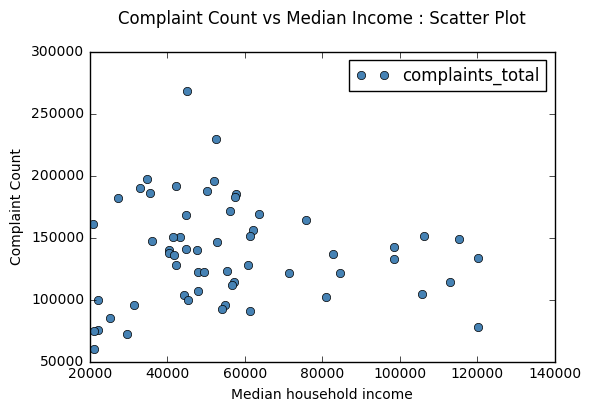

In [57]:
import pylab as pl

pl.plot(df_merge_final['median_income($)'], \
        df_merge_final['complaints_total'], 'o', color ='SteelBlue')
pl.xlabel('Median household income')
pl.ylabel('Complaint Count')
pl.title('Complaint Count vs Median Income : Scatter Plot\n')
pl.legend()
pl.show()

As observed by the plot, community districts with low income are less likely to make 311 calls. Most community districts with a median income of more than 40,000 USD make more than 100,000 calls.
Community districts with median income of betwenn 40,000 USD to 80,000 USD make the most 311 calls.
There is no proportional increase in 311 calls made by high median income group (median income > 100,000 USD) and those community districts make average if not less 311 calls as compared to the middle median income group

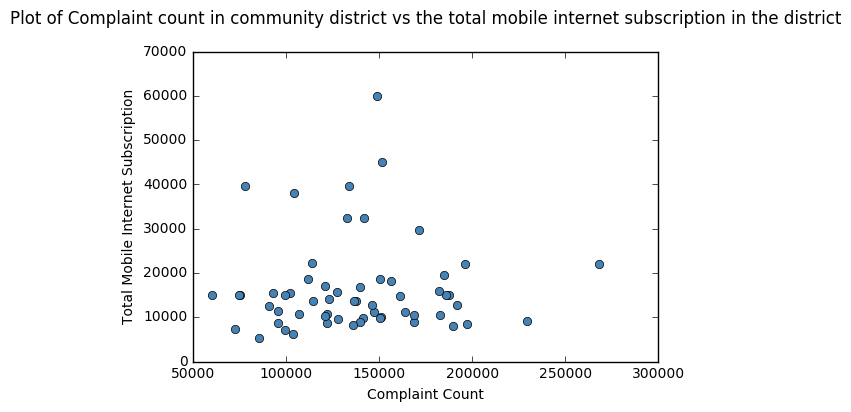

In [59]:
pl.plot(df_merge_final['complaints_total'], \
        df_merge_final['mobile_subscription'], 'o', color='SteelBlue')
pl.xlabel('Complaint Count')
pl.ylabel('Total Mobile Internet Subscription')
pl.title('Plot of Complaint count in community district vs the total mobile internet subscription in the district\n')
# pl.legend()
pl.show()

Locations with high mobile internet subscription do not have a proportional increase in complain count. Complain count varies from 10,000 to 20,000 without any significant change in mobile internet subscription